# Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 1. Generación del conjunto de datos

In [1]:
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.rand(100,1)
print("La longitud de datos es:",len(X))

La longitud de datos es: 100


### 2. Visualización del conjunto de datos

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

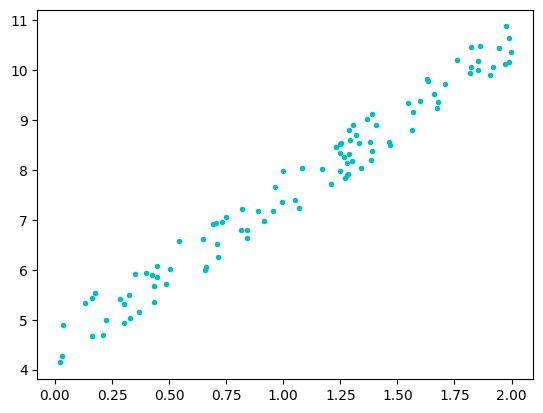

In [6]:
plt.plot(X,y,"c.")
plt.show()

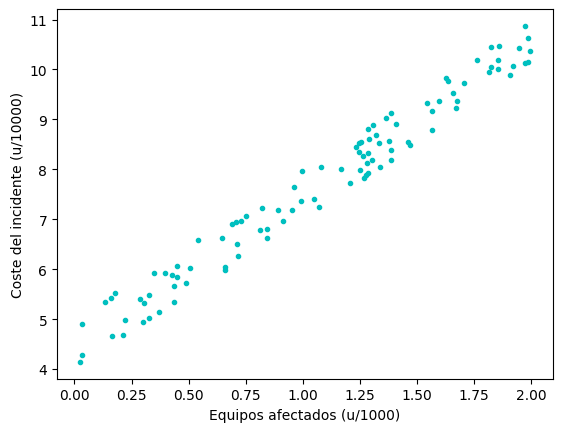

In [7]:
plt.plot(X,y,"c.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

### 3. Modificación del conjunto de datos

In [8]:
import pandas as pd

In [9]:
data = {'n_equipos_afectados':X.flatten(),'coste':y.flatten()}
df=pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,1.070172,7.246934
1,0.133037,5.337298
2,0.730497,6.957411
3,1.253438,8.543511
4,1.567159,9.166228
5,0.842753,6.801597
6,1.946469,10.436430
7,1.265081,8.263766
8,0.161573,5.433112
9,1.365546,9.024479


In [10]:
#Escalar
df['n_equipos_afectados']=df['n_equipos_afectados']*1000
df['n_equipos_afectados']=df['n_equipos_afectados'].astype('int')

df['coste']=df['coste']*10000
df['coste']=df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,1070,72469
1,133,53372
2,730,69574
3,1253,85435
4,1567,91662
5,842,68015
6,1946,104364
7,1265,82637
8,161,54331
9,1365,90244


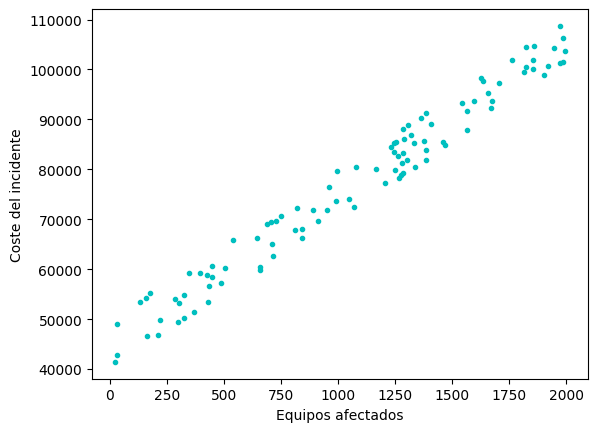

In [11]:
#Mostrar el dataset
plt.plot(df['n_equipos_afectados'],df['coste'],"c.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 4. Construcción del modelo

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
##Construir el modelo y vamos a ajustar la función
#Crear una instancia del modelo lineal
lin_reg = LinearRegression()
#reshape(-1,1): Convierta un arreglo unidemensional en una matriz
# con una sola columna
#fit: ajusta el modelo de regresion lineal a los datos
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1,1),df['coste'].values)

LinearRegression()

In [14]:
# Parametro de Theta 0
#Corte en el eje x
lin_reg.intercept_

44405.52561757743

In [15]:
#Parametro de theta 1
# La pendiente del modelo
lin_reg.coef_

array([30.43287102])

In [17]:
#Obtener el minimo y el maximo de nuestra funcion
X_min_max=np.array([[df["n_equipos_afectados"].min()],[df['n_equipos_afectados'].max()]])
y_train_pred=lin_reg.predict(X_min_max)

Text(0, 0.5, 'Coste')

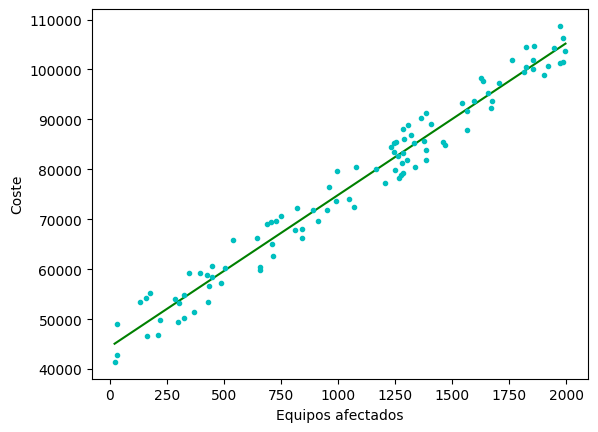

In [18]:
plt.plot(X_min_max,y_train_pred,"g-")
plt.plot(df['n_equipos_afectados'],df['coste'],"c.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste")

### 5. Predicción de nuevos ejemplos

In [21]:
x_new = np.array([[1200]])
#prediccion
coste = lin_reg.predict(x_new)
print("El coste del incidente seria:", int(coste[0])," Euros")

El coste del incidente seria: 80924  Euros


Text(0, 0.5, 'Coste')

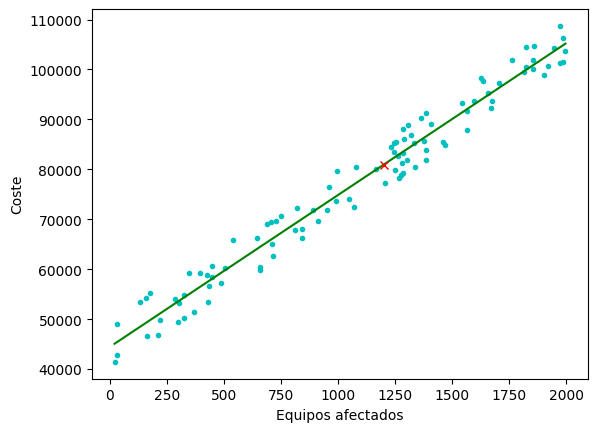

In [22]:
plt.plot(df['n_equipos_afectados'],df['coste'],"c.")
plt.plot(X_min_max,y_train_pred,"g-")
plt.plot(x_new, coste,"rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste")